# 연습

1. csv/num_1/ chipotle.tsv 로드 
2. order_id 컬럼의 데이터의 타입을 str 변경
3. 가장 많이 주문한 item_name을 출력 
4. item당 주문 총량의 top10을 바 그래프 표시 
5. item_price의 '$'를 제거하고 데이터의 타입을 float형태로 변경
6. 주문당 평균 계산 금액 출력

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')


In [70]:
import seaborn as sns

In [105]:
df = pd.read_csv('../csv/num_1/chipotle.tsv', sep = '\t')

df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [107]:
_origin_data = df.copy()

In [106]:
# order_id 컬럼 데이터 타입 str 변경  
df['order_id'] = df['order_id'].astype(str)



In [108]:
# 가장 많이 주문한 item_name
df.sort_values('quantity', ascending= False)['item_name'][0]

'Chips and Fresh Tomato Salsa'

In [109]:
df = df.sort_values('quantity', ascending= False).reset_index(drop = True)
df

,order_id,quantity,item_name,choice_description,item_price
0,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25
1,1660,10,Bottled Water,NaN,$15.00
2,1559,8,Side of Chips,NaN,$13.52
3,1443,7,Bottled Water,NaN,$10.50
4,970,5,Bottled Water,NaN,$7.50
...,...,...,...,...,...
4617,645,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
4618,645,1,Chips and Tomatillo Green Chili Salsa,NaN,$2.95
4619,646,1,Carnitas Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$9.25
4620,646,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$11.25


In [112]:
# item 당 주문 총량 top10

df_top = df[['quantity', 'item_name']].groupby('item_name').sum()
df_top

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


In [113]:
df_top10 = df_top.sort_values('quantity', ascending=False).iloc[0:10]
df_top10

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


<Axes: xlabel='item_name'>

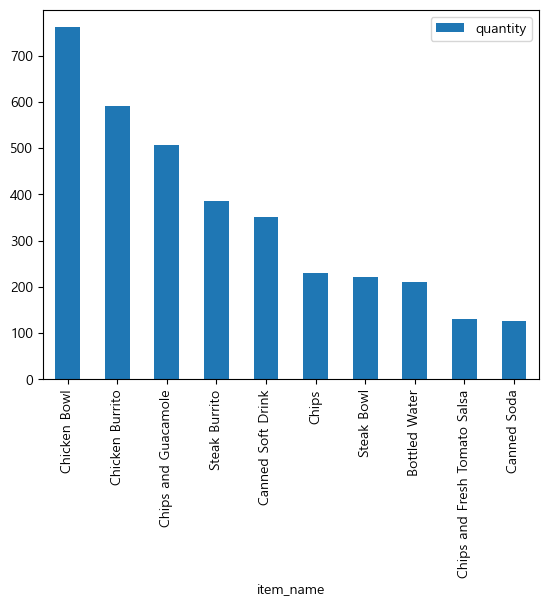

In [114]:
df_top10.plot.bar()

In [115]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25
1,1660,10,Bottled Water,NaN,$15.00
2,1559,8,Side of Chips,NaN,$13.52
3,1443,7,Bottled Water,NaN,$10.50
4,970,5,Bottled Water,NaN,$7.50
...,...,...,...,...,...
4617,645,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
4618,645,1,Chips and Tomatillo Green Chili Salsa,NaN,$2.95
4619,646,1,Carnitas Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$9.25
4620,646,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$11.25


In [117]:
# item_price $제거 후 타입 float 변경 

df['item_price'] =  df['item_price'].str.replace('$', '')
df


C:\Users\zino0\AppData\Local\Temp\ipykernel_17520\3655417820.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] =  df['item_price'].str.replace('$', '')


,order_id,quantity,item_name,choice_description,item_price
0,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
1,1660,10,Bottled Water,NaN,15.00
2,1559,8,Side of Chips,NaN,13.52
3,1443,7,Bottled Water,NaN,10.50
4,970,5,Bottled Water,NaN,7.50
...,...,...,...,...,...
4617,645,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
4618,645,1,Chips and Tomatillo Green Chili Salsa,NaN,2.95
4619,646,1,Carnitas Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",9.25
4620,646,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.25


In [118]:
df['item_price'] = df['item_price'].astype(float)
df

,order_id,quantity,item_name,choice_description,item_price
0,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
1,1660,10,Bottled Water,NaN,15.00
2,1559,8,Side of Chips,NaN,13.52
3,1443,7,Bottled Water,NaN,10.50
4,970,5,Bottled Water,NaN,7.50
...,...,...,...,...,...
4617,645,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
4618,645,1,Chips and Tomatillo Green Chili Salsa,NaN,2.95
4619,646,1,Carnitas Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",9.25
4620,646,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.25


In [125]:
# 주문당 평균 계산 금액(ZiNo : 개당 아이템 가격으로 이해 )

# 총 주문 금액 / 총 quantity

# 총 주문금액 ( = quantity * item_price) 컬럼 생성

df['total rev'] = df['quantity'] * df['item_price']
df 

,order_id,quantity,item_name,choice_description,item_price,total rev
0,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
1,1660,10,Bottled Water,NaN,15.00,150.00
2,1559,8,Side of Chips,NaN,13.52,108.16
3,1443,7,Bottled Water,NaN,10.50,73.50
4,970,5,Bottled Water,NaN,7.50,37.50
...,...,...,...,...,...,...
4617,645,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
4618,645,1,Chips and Tomatillo Green Chili Salsa,NaN,2.95,2.95
4619,646,1,Carnitas Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",9.25,9.25
4620,646,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.25,11.25


In [129]:
# 총 total rev / 총quantity 

df['total rev'].sum()/df['quantity'].sum()

7.891596942880129